# DATA VISUALIZATION - Scouting Palooza


Team Number: 6832

*Contact information*
Jesús Adrián Betancourt Ferreiro - Alternate Head Coach
jafbetancourt@gmail.com

**Baseline questions**

1. Percentage of teams doing defense
2. Behavior of defenders (defense score and agility)
3. Climbing levels
    * Ofense robots
    * Defense robots
4. Number of disconnections
5. Points contribution
    * Ofense robots
    * Defense robots
6. Autonomous behavior: upper and lower hub scoring and taxi
7. Best team doing defense
8. Points contribution
    * Upper hub
    * Lower hub


## LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
import matplotlib

/tmp/ipykernel_5326/2260588050.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


## DATA

The data set to use was part of the post season training of the scouters one week after our last regional.
The data was collected from the Silicon Valley 2022 regional.

In [ ]:
data = pd.read_csv("SiliconValley2022.csv")
data.head()

,Match,Robot,Equipo,PosInicial,taxi,Cargos en el upper hub,Cargos en el lower hub,Recoge cargo en el autónomo,Cargos en el upper hub.1,Cargos en el lower hub.1,Cargos Perdidos,Hace defensa,Wallbot,Zona de lanzamiento,Escalada,Defensa,Velocidad,Desconexion,Comentarios generales
0,1,r2,701,44,Y,1.0,0,Y,4.0,0.0,4.0,N,N,"7, 33, 17",N,1.0,4.0,N,NaN
1,1,r1,192,20/31,Y,0.0,0,N,2.0,0.0,9.0,N,N,56/66,N,1.0,8.0,N,"No defendió, mal promedio de lanzamiento, no s..."
2,1,r3,2035,19,N,0.0,0,N,0.0,0.0,0.0,Y,N,NaN,N,1.0,2.0,N,NaN
3,1,b1,751,53/41,Y,0.0,0,N,3.0,0.0,5.0,N,N,39/27 28/40 (centrado),1,1.0,6.0,N,NaN
4,1,b3,1967,30,Y,0.0,2,N,0.0,7.0,0.0,N,NaN,"30,42",N,1.0,6.0,N,NaN


### Data manipulation

**Variable renaming**

In order to be more descriptive about the data and the bes understanding for all FRC teams we renamed the variables from spanish to english.

In [ ]:

data.columns = [
    'Match',
    'Robot',
    'Team',
    'PosInicial',
    'Taxi',
    'AutoUpper',
    'AutoLower',
    'PickCargo',
    'TeleopUpper',
    'TeleopLower',
    'LostCargo',
    'Defense',
    'Wallbot',
    'ShootZone',
    'Climbing',
    'DefenseScore',
    'SpeedScore',
    'Disconnection',
    'Comments'
]

**Transforming data**

Changing categorical values for a better analysis.
Converting required variables to numeric.
Changing non expected values caused by mistakes during match scouting.
Filling empty records

In [ ]:
#Map for all the boolean values 

bool_mapper = {
    "Y" : 1,
    "N" : 0
}


In [ ]:
#Converting all the boolean values to  numeric based on the map created above 

data[['Taxi', 'PickCargo','Defense', 'Wallbot', 'Disconnection']] = data[['Taxi', 'PickCargo','Defense', 'Wallbot', 'Disconnection']].replace(bool_mapper)

#Converting the categorical data present in numerical variables 

data[['Climbing']] = data[['Climbing']].replace("N",0)

data['AutoLower'] = data['AutoLower'].replace("O", 0)

In [ ]:
#Convert categorical variables to numeric ones

data['Climbing']= pd.to_numeric(data['Climbing'])
data['AutoLower']=pd.to_numeric(data['AutoLower'])

In [ ]:
#Fill all the NA values

data.fillna(0, inplace=True)

### Understanding data

**Statistical measures**

In [ ]:
data.describe()

,Match,Team,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,LostCargo,Defense,Wallbot,Climbing,DefenseScore,SpeedScore,Disconnection
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,38.320455,3681.386364,0.872727,0.913636,0.168182,0.393182,4.009091,0.734091,1.956818,0.288636,0.081818,1.347727,1.143182,4.265909,0.072727
std,21.795792,2710.994066,0.333658,1.297201,0.625128,0.489013,7.514597,2.048328,2.145175,0.453644,0.274400,1.470901,1.819897,2.471656,0.259984
min,1.000000,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,852.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,39.000000,3482.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
75%,57.000000,5689.750000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,3.000000,1.000000,0.000000,2.000000,1.000000,6.000000,0.000000
max,75.000000,8793.000000,1.000000,5.000000,9.000000,1.000000,110.000000,11.000000,9.000000,1.000000,1.000000,4.000000,9.000000,10.000000,1.000000


array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

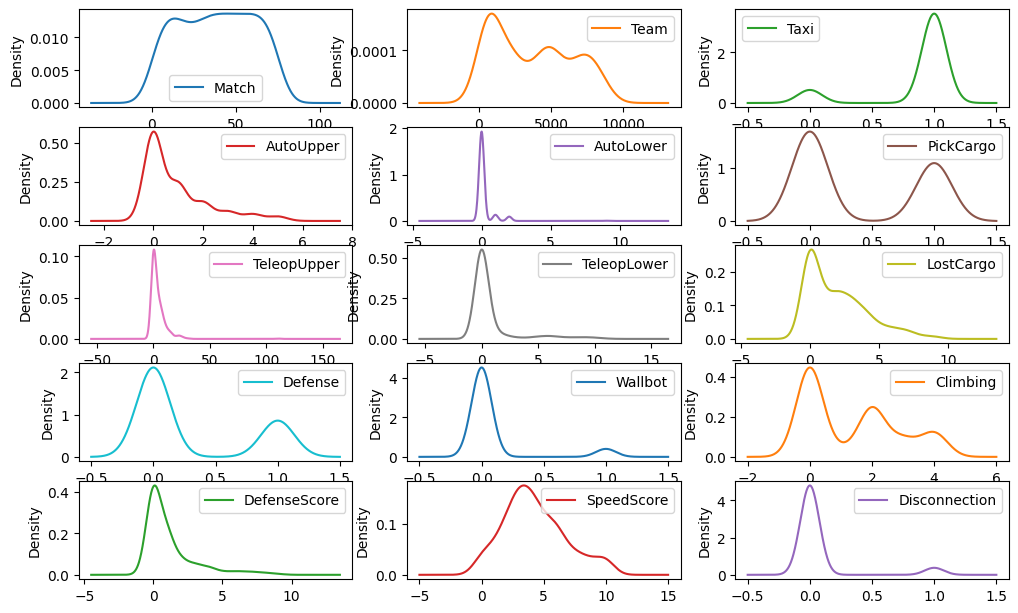

In [ ]:
data.plot(kind='density',subplots=True,layout=(8,3),figsize=(12,12),sharex=False)

With these graphs in a general way we can observe that most of the teams were focused on acomplishing the taxi during auto, but not necessarily scoring points in none of the hubs.
Also we can see that se that the speed score for most of the teams is a median speed.
In terms of climbing if the teams didn't climb they climbed to second level.

### Transforming data

Creation of aditional columns or modification of the existing ones required for the analysis.



In [ ]:
data['TotalAuto'] = data['Taxi'] * 2 + data['AutoUpper'] * 4 + data['AutoLower'] * 2
data['TotalTeleop'] = data['TeleopUpper'] * 2 + data['TeleopLower']

In [ ]:
data[['Climbing']] = data[['Climbing']].replace(1,4)
data[['Climbing']] = data[['Climbing']].replace(2,6)
data[['Climbing']] = data[['Climbing']].replace(3,10)
data[['Climbing']] = data[['Climbing']].replace(4,15)

In [ ]:
data['TotalScore'] = data['TotalAuto'] + data['TotalTeleop'] + data['Climbing']  

In [ ]:
data.head(20)

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
0,1,r2,701,44,1.0,1.0,0.0,1.0,4.0,0.0,...,0.0,"7, 33, 17",0.0,1.0,4.0,0.0,0,6.0,8.0,14.0
1,1,r1,192,20/31,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,56/66,0.0,1.0,8.0,0.0,"No defendió, mal promedio de lanzamiento, no s...",2.0,4.0,6.0
2,1,r3,2035,19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,1.0,2.0,0.0,0,0.0,0.0,0.0
3,1,b1,751,53/41,1.0,0.0,0.0,0.0,3.0,0.0,...,0.0,39/27 28/40 (centrado),15.0,1.0,6.0,0.0,0,2.0,6.0,23.0
4,1,b3,1967,30,1.0,0.0,2.0,0.0,0.0,7.0,...,0.0,"30,42",0.0,1.0,6.0,0.0,0,6.0,7.0,13.0
5,1,b2,4669,54,1.0,0.0,0.0,1.0,0.0,9.0,...,0.0,42/43,0.0,1.0,6.0,0.0,0,2.0,9.0,11.0
6,2,r2,2141,32/44,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,No,0.0,1.0,1.0,1.0,Que gran partido,4.0,0.0,4.0
7,2,r1,604,19,1.0,4.0,0.0,1.0,14.0,0.0,...,0.0,"19, 44, 45, 32",0.0,1.0,10.0,0.0,0,18.0,28.0,46.0
8,2,r3,668,43/44,1.0,1.0,0.0,0.0,3.0,0.0,...,0.0,18/19,0.0,9.0,10.0,0.0,0,6.0,6.0,12.0
9,2,b1,299,30,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,1.0,3.0,0.0,"Caballea, no hace puntos, le hace defensa al r...",2.0,0.0,2.0


In [ ]:
data2 = data
data3 = data

## Baseline Questions


### Defensive robots

In [ ]:
df = data.groupby(['Defense'])['Defense'].count().reset_index(name='count')
fig = px.pie(df, values='count', names='Defense', title='Denfense')
fig.show()

We can determine that in the regional about 30% of the teams were trying to do defense, that tell us that  we have more probability to face a ofensive robot.
In case that our robot can't do defense we are going to look for a alliance partner to fulfill this role, and that's why we need to get the best defensive robot according to their defensive score, speed, agility and points contribution.This sceneario was the one we affront in our first regional (Monterrey).
On the other hand, for STEAMex, this season we were aspiring to be a defensive robot in pur second regional(Los Angeles), so the analysis of the rest defensive robots allow us to compare ourselves so we can identify our strengths so we can get a good alliance.

In [ ]:
defense_robots = data[data['Defense']==1]


#### Defense Score
Graphs and comparisons made to get the best robots according to defense score.

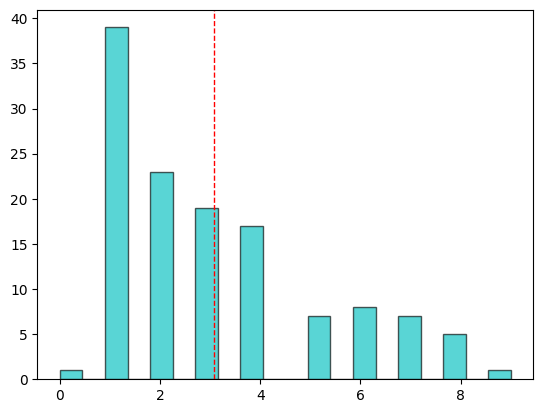

In [ ]:
result = plt.hist(defense_robots['DefenseScore'], bins=20, color='c', edgecolor='k', alpha=0.65)

In [85]: plt.axvline(defense_robots['DefenseScore'].mean(), color='r', linestyle='dashed', linewidth=1)

This graph show us that the mean score for the defense were low in a scale from 0 to 10.


In [ ]:
metrics = defense_robots.groupby("Team").mean()[["DefenseScore", "SpeedScore", "TotalScore", "Climbing"]].reset_index()
metrics

,Team,DefenseScore,SpeedScore,TotalScore,Climbing
0,192,4.000000,3.500000,6.000000,0.000000
1,199,1.000000,5.000000,9.000000,3.000000
2,299,2.333333,3.333333,4.000000,2.000000
3,649,2.500000,7.500000,32.000000,15.000000
4,668,5.666667,6.333333,9.333333,0.000000
5,701,6.000000,7.000000,8.000000,6.000000
6,751,1.000000,2.000000,12.000000,6.000000
7,766,3.875000,4.125000,13.000000,10.250000
8,840,3.428571,4.142857,6.571429,4.285714
9,841,2.000000,4.500000,13.500000,7.500000


In [ ]:
data_defense = metrics.sort_values(by = ['DefenseScore'], ascending=False)
stats_mean = data_defense["DefenseScore"].mean()
print("Defense score mean: " + str(stats_mean))

fig = px.bar(data, x="Team", y="DefenseScore", color="DefenseScore", title="Defense Score")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

Defense score mean: 3.045213293650793


In [ ]:
result= defense_robots.nlargest(n=10, columns=['DefenseScore'])
result
top_defense= np.unique(result['Team'].values)
print(top_defense)

[ 668  766  852  971 1072 2367 6238]


#### Speed Score
Graphs and comparisons made to get the best robots according to speed/agility score

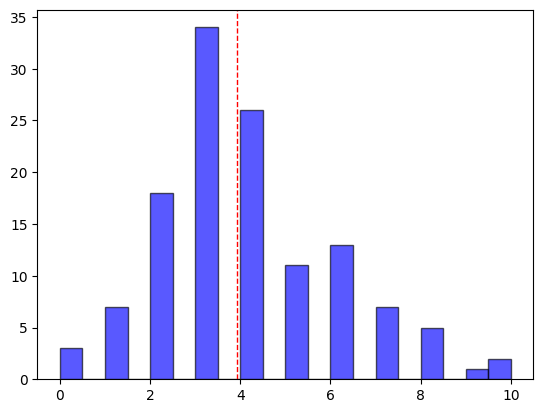

In [ ]:
result = plt.hist(defense_robots['SpeedScore'], bins=20, color='b', edgecolor='k', alpha=0.65)

In [85]: plt.axvline(defense_robots['SpeedScore'].mean(), color='r', linestyle='dashed', linewidth=1)

In [ ]:
result= defense_robots.nlargest(n=10, columns=['SpeedScore'])
result

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
8,2,r3,668,43/44,1.0,1.0,0.0,0.0,3.0,0.0,...,0.0,18/19,0.0,9.0,10.0,0.0,0,6.0,6.0,12.0
265,46,b1,971,54,1.0,5.0,0.0,1.0,18.0,0.0,...,1.0,"39,40,7,21,22,50,51,54,56",0.0,8.0,10.0,0.0,0,22.0,36.0,58.0
436,75,r3,8033,32,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,3.0,9.0,0.0,"Muy rápidos, se nota que no saben defender per...",6.0,0.0,6.0
21,4,b1,649,17,1.0,2.0,0.0,1.0,2.0,0.0,...,0.0,"17,29",15.0,1.0,8.0,0.0,El intake ya no bajó y tuvieron que jugar defe...,10.0,4.0,29.0
27,5,b1,5507,42,1.0,1.0,0.0,1.0,11.0,0.0,...,0.0,"29,19",10.0,1.0,8.0,0.0,20 segundos para escalar,6.0,22.0,38.0
149,27,r1,1072,19,1.0,3.0,0.0,1.0,11.0,1.0,...,0.0,"6,7,21,45,52,57",15.0,5.0,8.0,0.0,0,14.0,23.0,52.0
274,48,r1,2367,56,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,10.0,7.0,8.0,0.0,Fue mayor defensa aunque por el tamaño el robo...,2.0,0.0,12.0
403,69,b3,2367,41,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,7.0,8.0,0.0,Suficientemente rápido para aguantarle el ritm...,2.0,0.0,2.0
111,19,r2,7419,44,1.0,1.0,0.0,1.0,5.0,0.0,...,1.0,"44, 45, 64, 50, 51, 21",6.0,4.0,7.0,1.0,Aparte de tener desconexión combino defensa co...,6.0,10.0,22.0
197,35,b1,840,54,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,5.0,7.0,0.0,"Defensa agresiva, pero no se sabe las reglas y...",2.0,0.0,2.0


In [ ]:
data_defense = metrics.sort_values(by = ['SpeedScore'], ascending=False)
stats_mean = data_defense["SpeedScore"].mean()
print("Speed score mean: " + str(stats_mean))

fig = px.bar(data_defense, x="Team", y="SpeedScore", color="SpeedScore", title="Speed Score")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

Speed score mean: 4.18891369047619


In [ ]:
top_speed= np.unique(result['Team'].values)
print(top_speed)

[ 649  668  840  971 1072 2367 5507 7419 8033]


#### Points contribution
Graphs and comparisons made to get the best robots according to the points contribution

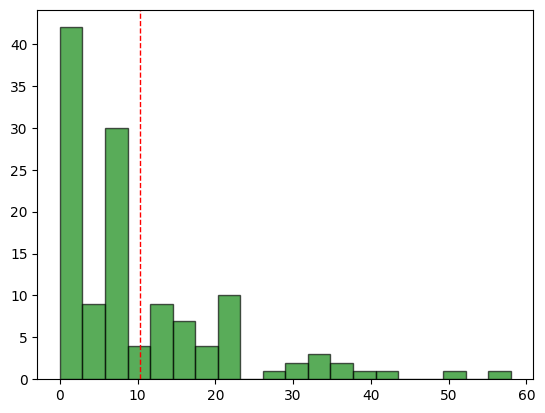

In [ ]:
result = plt.hist(defense_robots['TotalScore'], bins=20, color='g', edgecolor='k', alpha=0.65)

In [85]: plt.axvline(defense_robots['TotalScore'].mean(), color='r', linestyle='dashed', linewidth=1)

In [ ]:
data_defense = metrics.sort_values(by = ['TotalScore'], ascending=False)
stats_mean = data_defense["TotalScore"].mean()
print("Speed score mean: " + str(stats_mean))

fig = px.bar(data_defense, x="Team", y="TotalScore", color="TotalScore", title="TotalScore")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

Speed score mean: 13.01954365079365


In [ ]:
result= defense_robots.nlargest(n=10, columns=['TotalScore'])
top_scorers= np.unique(result['Team'].values)
print(top_scorers)

[ 649  971  972 1072 4255 5419 5507]


#### Climbing contribution
Graphs and comparisons made to get the best robots according to climbing performance

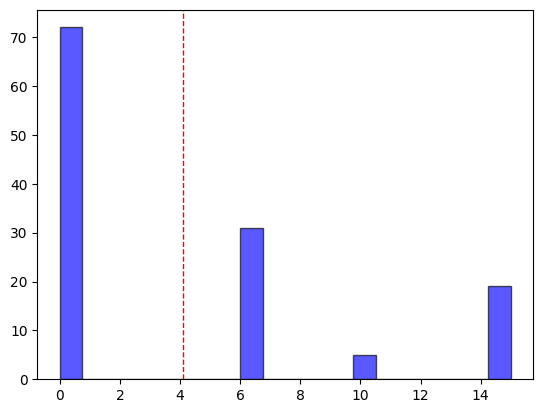

In [ ]:
result = plt.hist(defense_robots['Climbing'], bins=20, color='b', edgecolor='k', alpha=0.65)

In [85]: plt.axvline(defense_robots['Climbing'].mean(), color='r', linestyle='dashed', linewidth=1)

In [ ]:
data_defense = metrics.sort_values(by = ['Climbing'], ascending=False)
stats_mean = data_defense["Climbing"].mean()
print("Climbing mean: " + str(stats_mean))

fig = px.bar(data_defense, x="Team", y="Climbing", color="Climbing", title="Climbing")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

Climbing mean: 4.481299603174603


Frequency of the teams that played defense.

<AxesSubplot: >

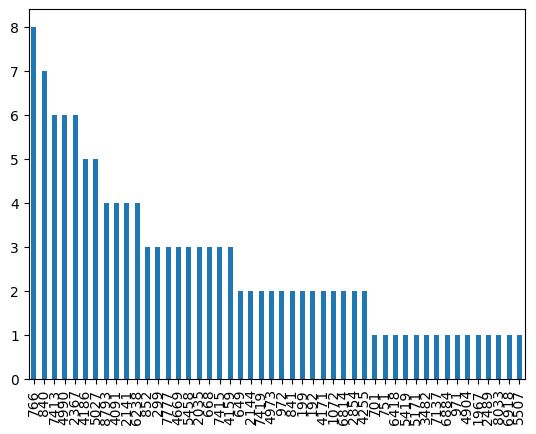

In [ ]:
freq_team= defense_robots['Team'].value_counts()

freq_team.plot(kind='bar')


In [ ]:
# List of teams that made defense most of the time
defenders = freq_team.head(15).index.tolist()


In [ ]:
#Comparing the teams that made defense most of the time with the top of each category

c1 = np.intersect1d(defenders,top_defense)
print(c1)
c2 = np.intersect1d(defenders,top_speed)
print(c2)

#Best defenders

z = np.concatenate((c1, c2))
z=np.unique(z)
print(z)

[ 766  852 2367 6238]
[ 840 2367]
[ 766  840  852 2367 6238]


In [ ]:
# Info about the best defensive robots
for i in z:

    print("Team " + str(i)+ " : ")

    print("Total Score: " + str(defense_robots.loc[defense_robots['Team'] == i, 'TotalScore'].mean()))

    print("Defense Score: " + str(defense_robots.loc[defense_robots['Team'] == i, 'DefenseScore'].mean()))

    print("Speed Score: " + str(defense_robots.loc[defense_robots['Team'] == i, 'SpeedScore'].mean()))

    print("Climbing: " + str(defense_robots.loc[defense_robots['Team'] == i, 'Climbing'].mean()))
    
    print("---------------------------------------")

Team 766 : 
Total Score: 13.0
Defense Score: 3.875
Speed Score: 4.125
Climbing: 10.25
---------------------------------------
Team 840 : 
Total Score: 6.571428571428571
Defense Score: 3.4285714285714284
Speed Score: 4.142857142857143
Climbing: 4.285714285714286
---------------------------------------
Team 852 : 
Total Score: 10.0
Defense Score: 6.0
Speed Score: 4.666666666666667
Climbing: 2.0
---------------------------------------
Team 2367 : 
Total Score: 3.6666666666666665
Defense Score: 5.166666666666667
Speed Score: 6.166666666666667
Climbing: 1.6666666666666667
---------------------------------------
Team 6238 : 
Total Score: 20.5
Defense Score: 4.75
Speed Score: 4.0
Climbing: 15.0
---------------------------------------


### Ofensive Robots

In [ ]:
ofensive_robots = data[data['Defense']==0]


In [ ]:
metrics = ofensive_robots.groupby("Team").mean()[["Climbing", "TeleopUpper", "TeleopLower", "TotalTeleop"]].reset_index()
metrics

,Team,Climbing,TeleopUpper,TeleopLower,TotalTeleop
0,192,2.500000,2.166667,0.166667,4.500000
1,199,4.000000,2.833333,0.166667,5.833333
2,254,11.375000,21.625000,0.125000,43.375000
3,299,4.800000,0.600000,0.000000,1.200000
4,581,0.000000,0.000000,1.500000,1.500000
5,604,8.875000,12.625000,0.000000,25.250000
6,649,8.200000,7.800000,0.000000,15.600000
7,668,0.000000,2.200000,0.200000,4.600000
8,670,7.428571,8.571429,0.142857,17.285714
9,701,2.400000,5.200000,0.000000,10.400000


<AxesSubplot: >

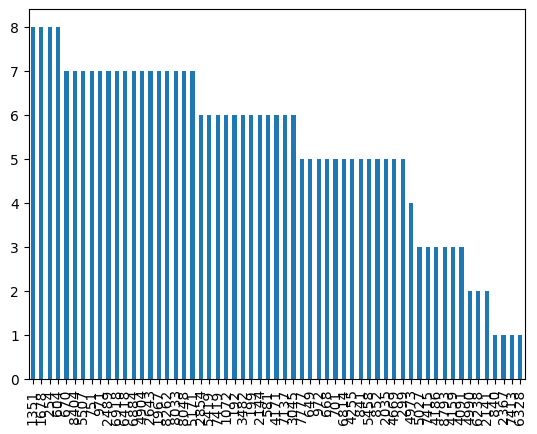

In [ ]:
freq_team= ofensive_robots['Team'].value_counts()
freq_team.plot(kind='bar')

#### Upper Hub

<AxesSubplot: >

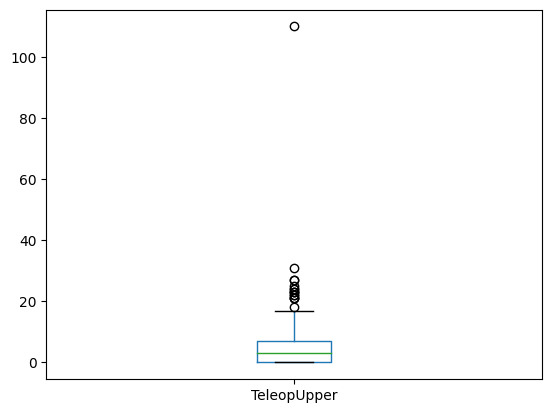

In [ ]:
ofensive_robots['TeleopUpper'].plot.box()

In [ ]:
def find_outliers_IQR(ofensive_robots):

   q1=ofensive_robots.quantile(0.25)

   q3=ofensive_robots.quantile(0.75)

   IQR=q3-q1

   outliers = ofensive_robots[((ofensive_robots<(q1-1.5*IQR)) | (ofensive_robots>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(ofensive_robots['TeleopUpper'])

print("Max outlier value: "+ str(outliers.max()))

Max outlier value: 110.0


In [ ]:
#Identifying and error from the data collect

ofensive_robots.loc[ofensive_robots['TeleopUpper'].isin([outliers.max()])]

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
430,74,r3,7419,19,1.0,2.0,0.0,1.0,110.0,0.0,...,0.0,"7,9,21",0.0,0.0,4.0,0.0,Fallan un cargo en autónomo,10.0,220.0,230.0


In [ ]:
#Removing the outlier
ofensive_robots.drop(ofensive_robots[ofensive_robots["TeleopUpper"]== outliers.max()].index, inplace= True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: >

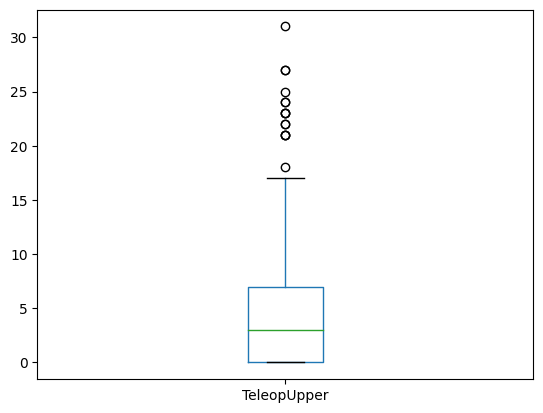

In [ ]:
ofensive_robots['TeleopUpper'].plot.box()

In [ ]:
outliers = find_outliers_IQR(ofensive_robots['TeleopUpper'])

print("Max outlier value: "+ str(outliers.max()))

Max outlier value: 31.0


In [ ]:
ofensive_robots.loc[ofensive_robots['TeleopUpper'].isin([outliers.max()])]

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
233,41,b1,1678,54,1.0,3.0,0.0,1.0,31.0,0.0,...,0.0,"51,16,21,57,39",15.0,0.0,10.0,0.0,0,14.0,62.0,91.0


#### Lower Hub

<AxesSubplot: >

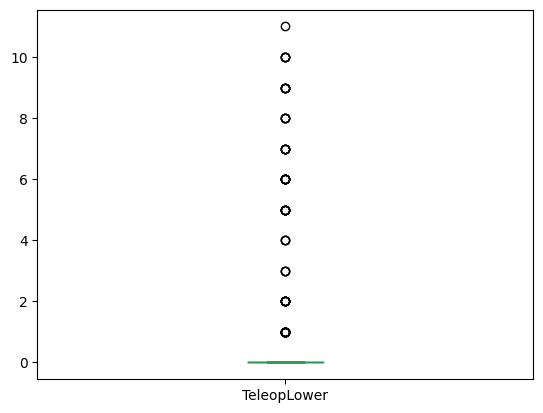

In [ ]:
ofensive_robots['TeleopLower'].plot.box()

In [ ]:
outliers = find_outliers_IQR(ofensive_robots['TeleopLower'])

print("Max outlier value: "+ str(outliers.max()))

Max outlier value: 11.0


In [ ]:
ofensive_robots.loc[ofensive_robots['TeleopLower'].isin([outliers.max()])]

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
378,65,b2,6884,30,1.0,0.0,1.0,0.0,0.0,11.0,...,0.0,"30,31,42",0.0,0.0,4.0,0.0,Buen awarness para no entrar al hangar rojo y ...,4.0,11.0,15.0


<AxesSubplot: >

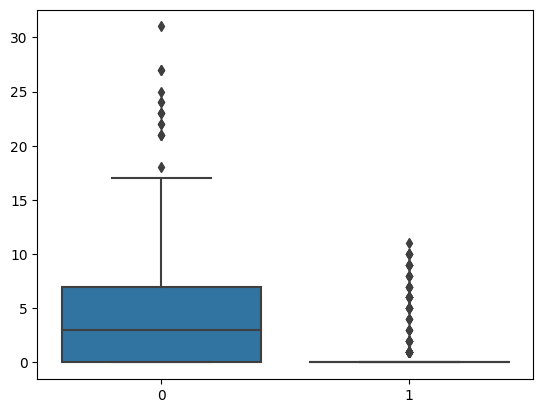

In [ ]:
sns.boxplot(data=[ofensive_robots['TeleopUpper'], ofensive_robots['TeleopLower']])

With this comparison we could notice that the game was focused on being a defensive robot scoring into de upper hub.

In [ ]:
#Best teams scoring cargo in the upper hub

data_ofense = metrics.sort_values(by=['TeleopUpper'], ascending=False)
stats_mean = data_ofense["TeleopUpper"].mean()
fig = px.bar(data_ofense, x="Team", y="TeleopUpper", color="TeleopUpper", title="TeleopUpper")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

In [ ]:
#Best teams scoring cargo in the lower hub


data_ofense = metrics.sort_values(by=['TeleopLower'], ascending=False)
stats_mean = data_ofense["TeleopLower"].mean()
fig = px.bar(data_ofense, x="Team", y="TeleopLower", color="TeleopLower", title="TeleopLower")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

 #### Top Teleop Scorers

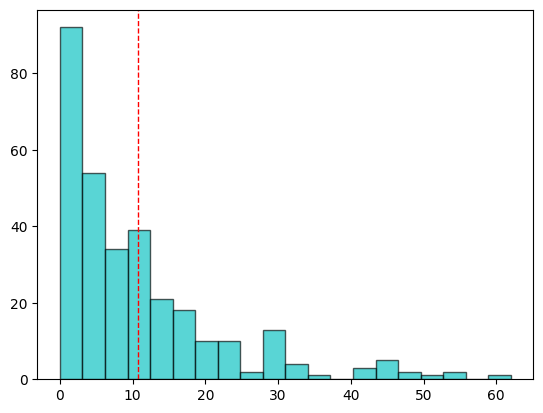

In [ ]:
result = plt.hist(ofensive_robots['TotalTeleop'], bins=20, color='c', edgecolor='k', alpha=0.65)

In [85]: plt.axvline(ofensive_robots['TotalTeleop'].mean(), color='r', linestyle='dashed', linewidth=1)

In [ ]:
#Best teams scoring during teleop


data_ofense = metrics.sort_values(by=['TotalTeleop'], ascending=False)
stats_mean = data_ofense["TotalTeleop"].mean()
fig = px.bar(data_ofense, x="Team", y="TotalTeleop", color="TotalTeleop", title="TotalTeleop")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

In [ ]:
result= ofensive_robots.nlargest(n=20, columns=['TotalScore'])
result

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
233,41,b1,1678,54,1.0,3.0,0.0,1.0,31.0,0.0,...,0.0,"51,16,21,57,39",15.0,0.0,10.0,0.0,0,14.0,62.0,91.0
282,49,b2,254,19,1.0,5.0,0.0,1.0,27.0,0.0,...,0.0,"4,5,9,23",15.0,0.0,10.0,0.0,"Dos veces hizo tiros de 3 cargo, incluso anota...",22.0,54.0,91.0
301,52,b3,1678,54,1.0,4.0,0.0,1.0,27.0,0.0,...,0.0,"45,57,52,40,16,6",15.0,0.0,10.0,0.0,0,18.0,54.0,87.0
54,10,r1,254,19,1.0,5.0,0.0,1.0,24.0,0.0,...,0.0,"66,57,21,52,33",15.0,0.0,10.0,0.0,Nice,22.0,48.0,85.0
435,75,r2,254,19,1.0,5.0,0.0,1.0,23.0,0.0,...,0.0,"28,6,21,33,34,45",15.0,0.0,10.0,0.0,De nuevo Cheesy teniendo 3 cargos al mismo tie...,22.0,46.0,83.0
194,35,r1,1678,19,1.0,4.0,0.0,1.0,24.0,0.0,...,0.0,"7,8,21,45,57,66,69",15.0,0.0,10.0,0.0,0,18.0,48.0,81.0
112,19,r3,1678,19,1.0,4.0,0.0,1.0,23.0,0.0,...,0.0,"17,20,33,39,40,45,56,57",15.0,0.0,9.0,0.0,0,18.0,46.0,79.0
360,62,b2,1678,54,1.0,5.0,0.0,1.0,21.0,0.0,...,0.0,"16,28,7,21,33,39",15.0,0.0,10.0,0.0,"Tuvo un momento de casi caída al pasar por 55,...",22.0,42.0,79.0
227,40,b1,254,54,1.0,4.0,0.0,1.0,22.0,0.0,...,0.0,"65,68,17,39,52,33",15.0,0.0,10.0,0.0,Un cargo rebota y falla en autónomo. En un mom...,18.0,44.0,77.0
420,72,b2,1678,54,1.0,4.0,0.0,1.0,21.0,0.0,...,0.0,"53,16,6,21",15.0,0.0,10.0,0.0,"Dios Coresetto está en todo, a los dos segundo...",18.0,42.0,75.0


In [ ]:
top_teleop_scorers= np.unique(result['Team'].values)
print(top_teleop_scorers)

[ 254  604  971 1072 1678]


#### Climbing

In [ ]:
#Teams with the best climbing performance


data_ofense = metrics.sort_values(by=['Climbing'], ascending=False)
stats_mean = data_ofense["Climbing"].mean()
fig = px.bar(data_ofense, x="Team", y="Climbing", color="Climbing", title="Climbing")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()


In [ ]:
result= ofensive_robots.nlargest(n=20, columns=['Climbing'])
result

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
3,1,b1,751,53/41,1.0,0.0,0.0,0.0,3.0,0.0,...,0.0,39/27 28/40 (centrado),15.0,1.0,6.0,0.0,0,2.0,6.0,23.0
14,3,r3,1072,19,1.0,3.0,0.0,1.0,21.0,0.0,...,0.0,"19, 7, 20, 56, 57, 45",15.0,2.0,10.0,0.0,"Controla la categorización por color, pero no ...",14.0,42.0,71.0
31,6,r1,6328,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,15.0,0.0,0.0,0.0,Match no disponible,2.0,0.0,17.0
43,8,r2,972,19,1.0,3.0,0.0,1.0,7.0,0.0,...,0.0,"6,7,8,19,45",15.0,2.0,6.0,0.0,0,14.0,14.0,43.0
46,8,b2,8033,29,1.0,2.0,0.0,0.0,5.0,0.0,...,0.0,"17,28",15.0,0.0,4.0,0.0,0,10.0,10.0,35.0
47,8,b3,1678,54,1.0,4.0,0.0,1.0,4.0,0.0,...,0.0,"7,17,53,57",15.0,0.0,7.0,0.0,0,18.0,8.0,41.0
54,10,r1,254,19,1.0,5.0,0.0,1.0,24.0,0.0,...,0.0,"66,57,21,52,33",15.0,0.0,10.0,0.0,Nice,22.0,48.0,85.0
65,12,r1,1072,19,1.0,2.0,0.0,1.0,10.0,0.0,...,0.0,"20, 65,7,17",15.0,2.0,8.0,0.0,Robot con buen movimiento dentro de cancha ade...,10.0,20.0,45.0
69,12,b2,5419,41,1.0,3.0,0.0,1.0,10.0,0.0,...,0.0,41,15.0,1.0,7.0,0.0,Muy buena puntería afectada solo por la defens...,14.0,20.0,49.0
84,14,r3,972,19,1.0,3.0,0.0,1.0,12.0,0.0,...,0.0,"52, 57, 19, 21",15.0,0.0,10.0,0.0,Carreo a todo el equipo grande Irob Claw,14.0,24.0,53.0


In [ ]:
top_climbers= np.unique(result['Team'].values)
print(top_teleop_scorers)

[ 254  604  971 1072 1678]


### Autonomous

In [ ]:
metrics = data.groupby("Team").mean()[["Taxi", "AutoUpper", "AutoLower", "TotalAuto"]].reset_index()
metrics

,Team,Taxi,AutoUpper,AutoLower,TotalAuto
0,192,1.000000,1.000000,0.000000,6.000000
1,199,1.000000,0.750000,1.125000,7.250000
2,254,1.000000,4.375000,0.000000,19.500000
3,299,1.000000,0.000000,0.000000,2.000000
4,581,0.833333,0.000000,0.166667,2.000000
5,604,1.000000,3.500000,0.000000,16.000000
6,649,1.000000,2.000000,0.000000,10.000000
7,668,0.875000,0.375000,0.000000,3.250000
8,670,1.000000,2.857143,0.000000,13.428571
9,701,1.000000,0.833333,0.000000,5.333333


In [ ]:
result= data.nlargest(n=20, columns=['TotalAuto'])
result

,Match,Robot,Team,PosInicial,Taxi,AutoUpper,AutoLower,PickCargo,TeleopUpper,TeleopLower,...,Wallbot,ShootZone,Climbing,DefenseScore,SpeedScore,Disconnection,Comments,TotalAuto,TotalTeleop,TotalScore
347,60,b1,199,30,1.0,1.0,9.0,1.0,2.0,0.0,...,0.0,"31,34",0.0,0.0,5.0,1.0,Se desconectan pegados al hub.,24.0,4.0,28.0
10,2,b2,971,54/55,1.0,5.0,0.0,1.0,15.0,0.0,...,0.0,"6/7 , 22, 66/67, 27/39",6.0,1.0,8.0,0.0,0,22.0,30.0,58.0
54,10,r1,254,19,1.0,5.0,0.0,1.0,24.0,0.0,...,0.0,"66,57,21,52,33",15.0,0.0,10.0,0.0,Nice,22.0,48.0,85.0
72,13,b1,604,54,1.0,5.0,0.0,1.0,13.0,0.0,...,0.0,10,10.0,1.0,9.0,0.0,Bastante rápidos con buena puntería mientras s...,22.0,26.0,58.0
114,20,b3,254,55,1.0,5.0,0.0,1.0,18.0,0.0,...,0.0,"49,59,54,64,65,18",0.0,3.0,10.0,0.0,0,22.0,36.0,58.0
183,33,r2,604,19,1.0,5.0,0.0,1.0,15.0,0.0,...,0.0,"16,33,40,52",0.0,0.0,7.0,0.0,0,22.0,30.0,52.0
265,46,b1,971,54,1.0,5.0,0.0,1.0,18.0,0.0,...,1.0,"39,40,7,21,22,50,51,54,56",0.0,8.0,10.0,0.0,0,22.0,36.0,58.0
282,49,b2,254,19,1.0,5.0,0.0,1.0,27.0,0.0,...,0.0,"4,5,9,23",15.0,0.0,10.0,0.0,"Dos veces hizo tiros de 3 cargo, incluso anota...",22.0,54.0,91.0
312,54,b2,971,54,1.0,5.0,0.0,1.0,13.0,0.0,...,0.0,"57,69,21,6,52",10.0,0.0,8.0,0.0,"Su climb a high tiene mucho swing, es un probl...",22.0,26.0,58.0
330,57,b2,254,54,1.0,5.0,0.0,1.0,22.0,0.0,...,0.0,"5,7,21,28,52,66,40",6.0,0.0,10.0,0.0,"El climb no jaló, se quedaron en mid",22.0,44.0,72.0


In [ ]:
top_auto_scorers= np.unique(result['Team'].values)
print(top_auto_scorers)

[ 199  254  604  670  971 1678 4255]


In [ ]:
#Autonomous performance

data_auto = metrics.sort_values(by=['TotalAuto'], ascending=False)
stats_mean = data_auto["TotalAuto"].mean()
fig = px.bar(data_auto, x="Team", y="TotalAuto", color="TotalAuto", title="TotalAuto")
fig.update_traces(width=70)
fig.add_shape(type='line',x0=0, y0=stats_mean,x1=1,y1=stats_mean,line=dict(color='Red',),xref='paper',yref='y')
fig.show()

### Heat maps
We created heat maps to visualize the points were most of the teams started a match so we can indentify the best positions for the autonomous.
On the other hand, we have the shooting zones so we can create strategies to prevent the rest of the teams from scoring

In [ ]:
d = {
    'PosInicial': [1, 2, 3, 4, 5,6,7,8,9,10,11,12,
    13,14,15,16,17,18,19,20,21,22,23,24,
    25,26,27,28,29,30,31,32,33,34,35,36,
    37,38,39,40,41,42,43,44,45,46,47,48,
    49,50,51,52,53,54,55,56,57,58,59,60,
    61,62,63,64,65,66,67,68,69,70,71,72], 

    'x': [0,1,2,3,4,5,6,7,8,9,10,11,
    0,1,2,3,4,5,6,7,8,9,10,11,
    0,1,2,3,4,5,6,7,8,9,10,11,
    0,1,2,3,4,5,6,7,8,9,10,11,
    0,1,2,3,4,5,6,7,8,9,10,11,
    0,1,2,3,4,5,6,7,8,9,10,11], 

    'y': [0,0,0,0,0,0,0,0,0,0,0,0,
    1,1,1,1,1,1,1,1,1,1,1,1,
    2,2,2,2,2,2,2,2,2,2,2,2,
    3,3,3,3,3,3,3,3,3,3,3,3,
    4,4,4,4,4,4,4,4,4,4,4,4,
    5,5,5,5,5,5,5,5,5,5,5,5]
}



In [ ]:
data['PosInicial']

0         44
1      20/31
2         19
3      53/41
4         30
       ...  
435       19
436       32
437       17
438       29
439       54
Name: PosInicial, Length: 440, dtype: object

In [ ]:
data['PosInicial'] = data['PosInicial'].str[:2]
print(data['PosInicial'])  

0      44
1      20
2      19
3      53
4      30
       ..
435    19
436    32
437    17
438    29
439    54
Name: PosInicial, Length: 440, dtype: object


In [ ]:
df = pd.DataFrame(data=d)
result = dict(zip( df['PosInicial'],zip(df['x'], df['y'])))


{1: (0, 0),
 2: (1, 0),
 3: (2, 0),
 4: (3, 0),
 5: (4, 0),
 6: (5, 0),
 7: (6, 0),
 8: (7, 0),
 9: (8, 0),
 10: (9, 0),
 11: (10, 0),
 12: (11, 0),
 13: (0, 1),
 14: (1, 1),
 15: (2, 1),
 16: (3, 1),
 17: (4, 1),
 18: (5, 1),
 19: (6, 1),
 20: (7, 1),
 21: (8, 1),
 22: (9, 1),
 23: (10, 1),
 24: (11, 1),
 25: (0, 2),
 26: (1, 2),
 27: (2, 2),
 28: (3, 2),
 29: (4, 2),
 30: (5, 2),
 31: (6, 2),
 32: (7, 2),
 33: (8, 2),
 34: (9, 2),
 35: (10, 2),
 36: (11, 2),
 37: (0, 3),
 38: (1, 3),
 39: (2, 3),
 40: (3, 3),
 41: (4, 3),
 42: (5, 3),
 43: (6, 3),
 44: (7, 3),
 45: (8, 3),
 46: (9, 3),
 47: (10, 3),
 48: (11, 3),
 49: (0, 4),
 50: (1, 4),
 51: (2, 4),
 52: (3, 4),
 53: (4, 4),
 54: (5, 4),
 55: (6, 4),
 56: (7, 4),
 57: (8, 4),
 58: (9, 4),
 59: (10, 4),
 60: (11, 4),
 61: (0, 5),
 62: (1, 5),
 63: (2, 5),
 64: (3, 5),
 65: (4, 5),
 66: (5, 5),
 67: (6, 5),
 68: (7, 5),
 69: (8, 5),
 70: (9, 5),
 71: (10, 5),
 72: (11, 5)}

#### Starting Position

In [ ]:
Coordinates = {}
i= 0
for row in data['PosInicial']:
    try:
        Coordinates[i] = [result[int(row)][0], result[int(row)][1]]
        i += 1
    except:
        pass
    


In [ ]:
AM = np.zeros([100, 350]); # Activation Map

for i in range(len(Coordinates)):
  x, y = Coordinates[i];  
  x1 = int((y+3) / 4 *40)
  y1 = int((x+12)/ 4 *40)
  AM[x1,y1] += 1;

(0.0, 350.0) (100.0, 0.0)


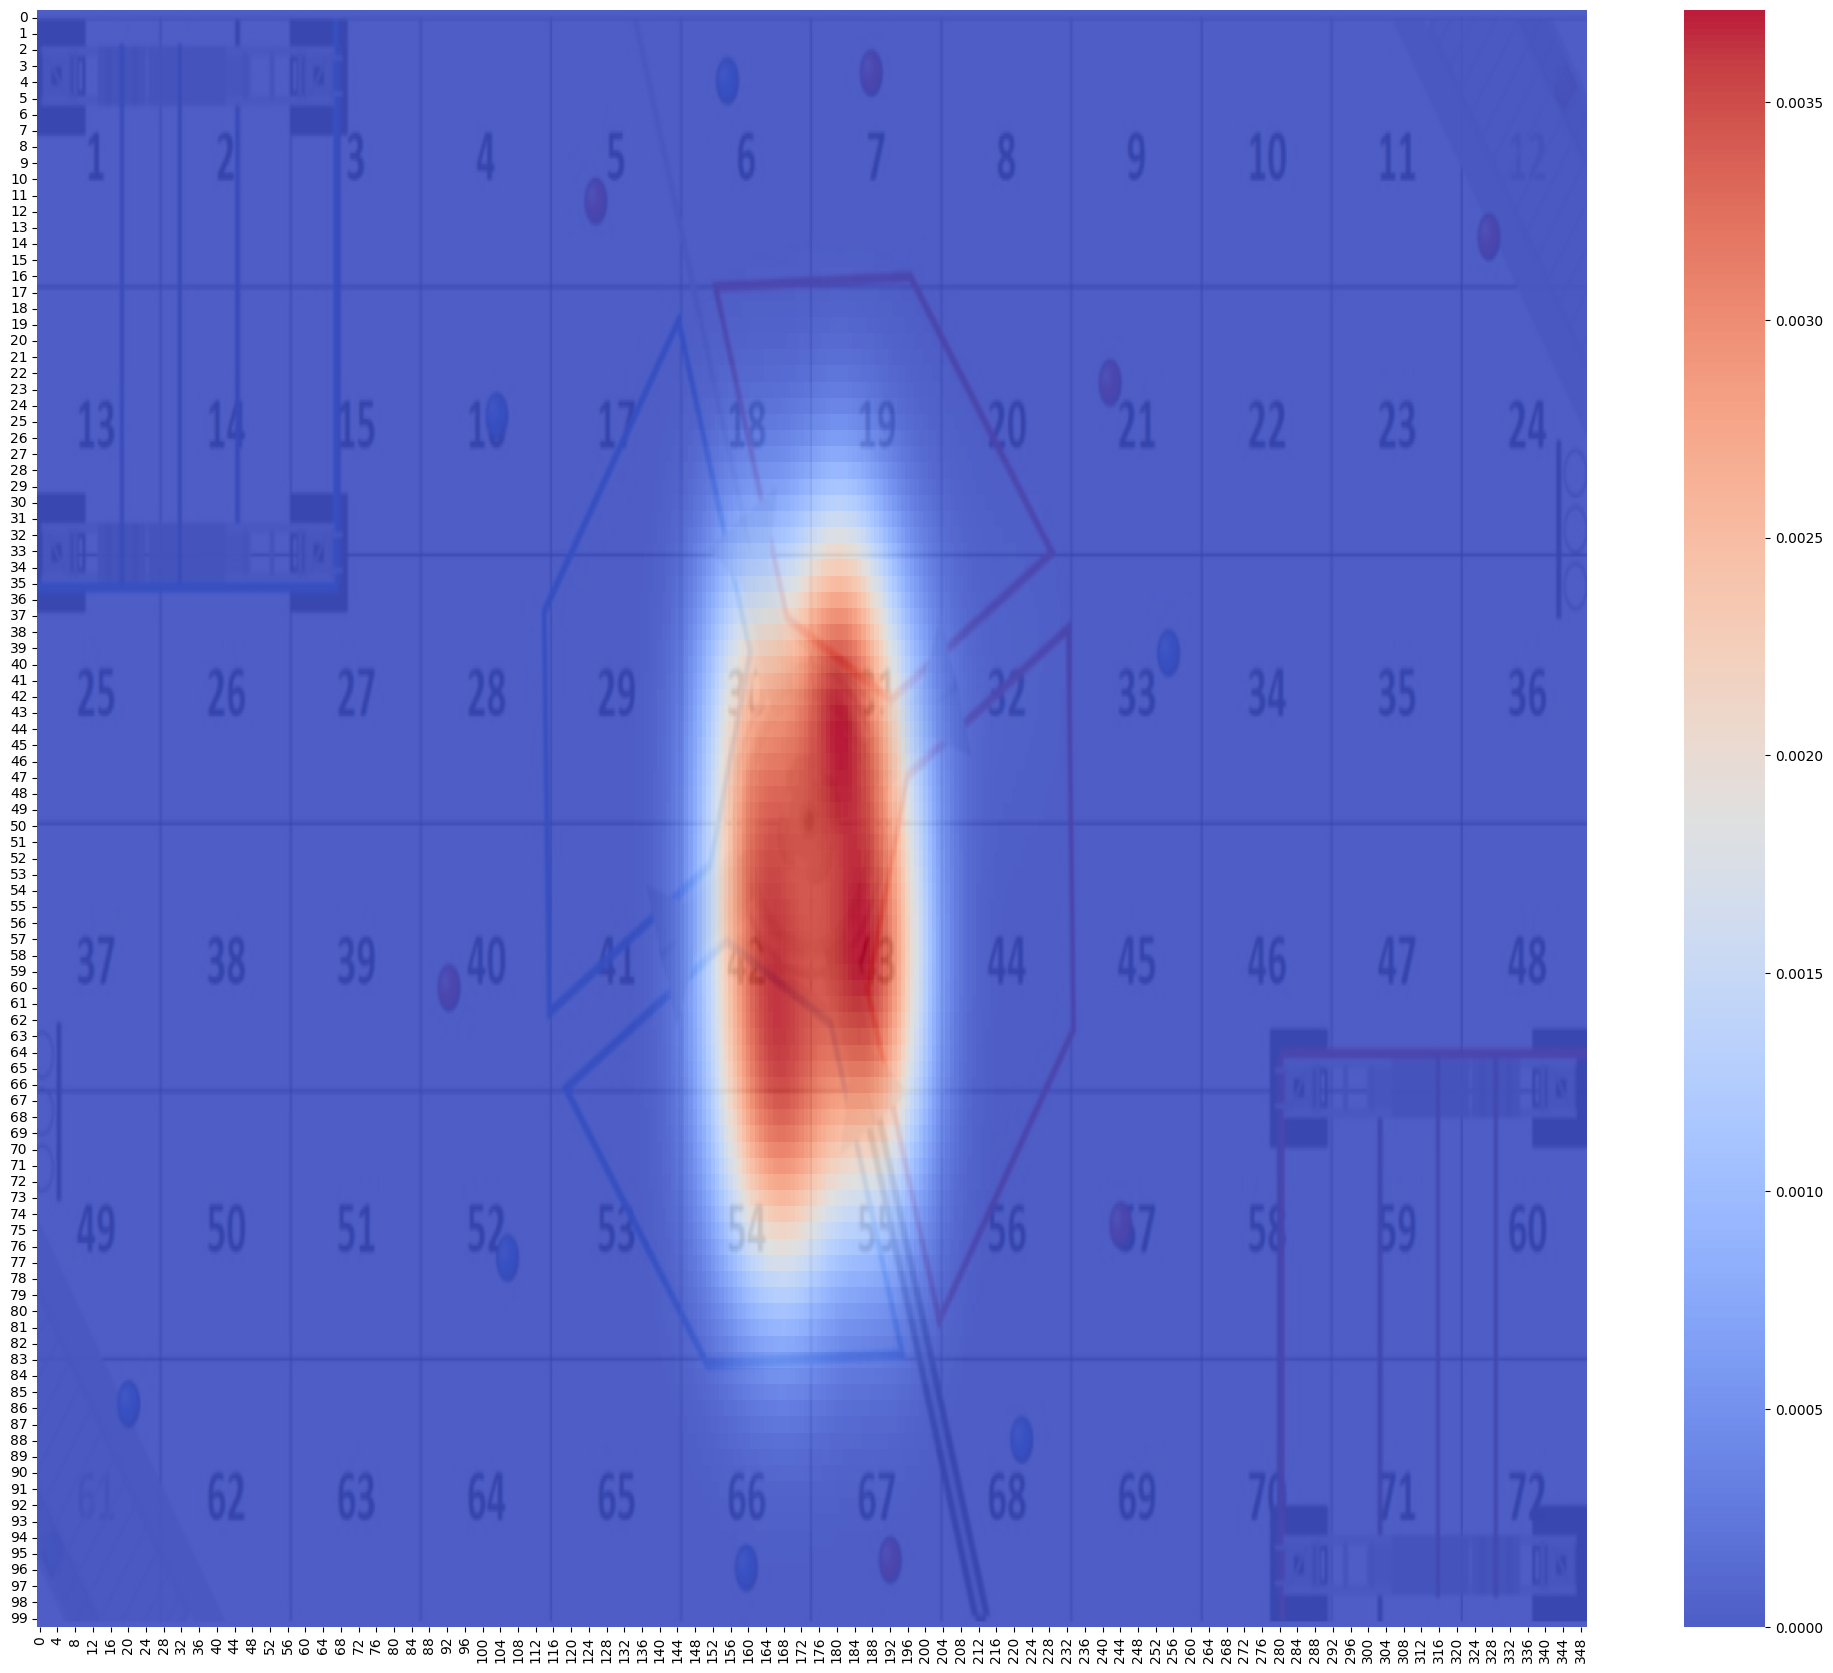

In [ ]:
AM_img = AM/np.max(AM); 

AM_img = gaussian_filter(AM_img, sigma=8);

I_scr = Image.open("Field.jpg")

fig, ax = plt.subplots(figsize=(25,21))

hmax = sns.heatmap(AM_img, ax=ax,
            cmap = matplotlib.cm.coolwarm,
            alpha = 0.9, 
            annot = False,
            zorder = 2
            )

hmax.imshow(I_scr, 
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap

print(hmax.get_xlim(), hmax.get_ylim())

#### Shooting positions

In [ ]:

data[['ShootZone']] = data[['ShootZone']].replace("N.a",29)


coords = []
for row in data['ShootZone']:
    try:
        x = row.split(",")
        coords = coords + x
    except:
        try:
            x= row.split("/")
           
        except:
            try:
                x= x.split(",")
                coords = coords + x
            except:
                pass
                     



In [ ]:
coords = [item for item in coords if len(item) <= 2 ]
coords.remove("No")


In [ ]:
Coordinates = {}
i= 0
for row in coords:
    try:
        Coordinates[i] = [result[int(row)][0], result[int(row)][1]]
        i += 1
    except:
        pass


In [ ]:
AM = np.zeros([100, 350]); # Activation Map

for i in range(len(Coordinates)):
  x, y = Coordinates[i];  
  x1 = int((y+3) / 4 *40)
  y1 = int((x+12)/ 4 *40)
  AM[x1,y1] += 1;

(0.0, 350.0) (100.0, 0.0)


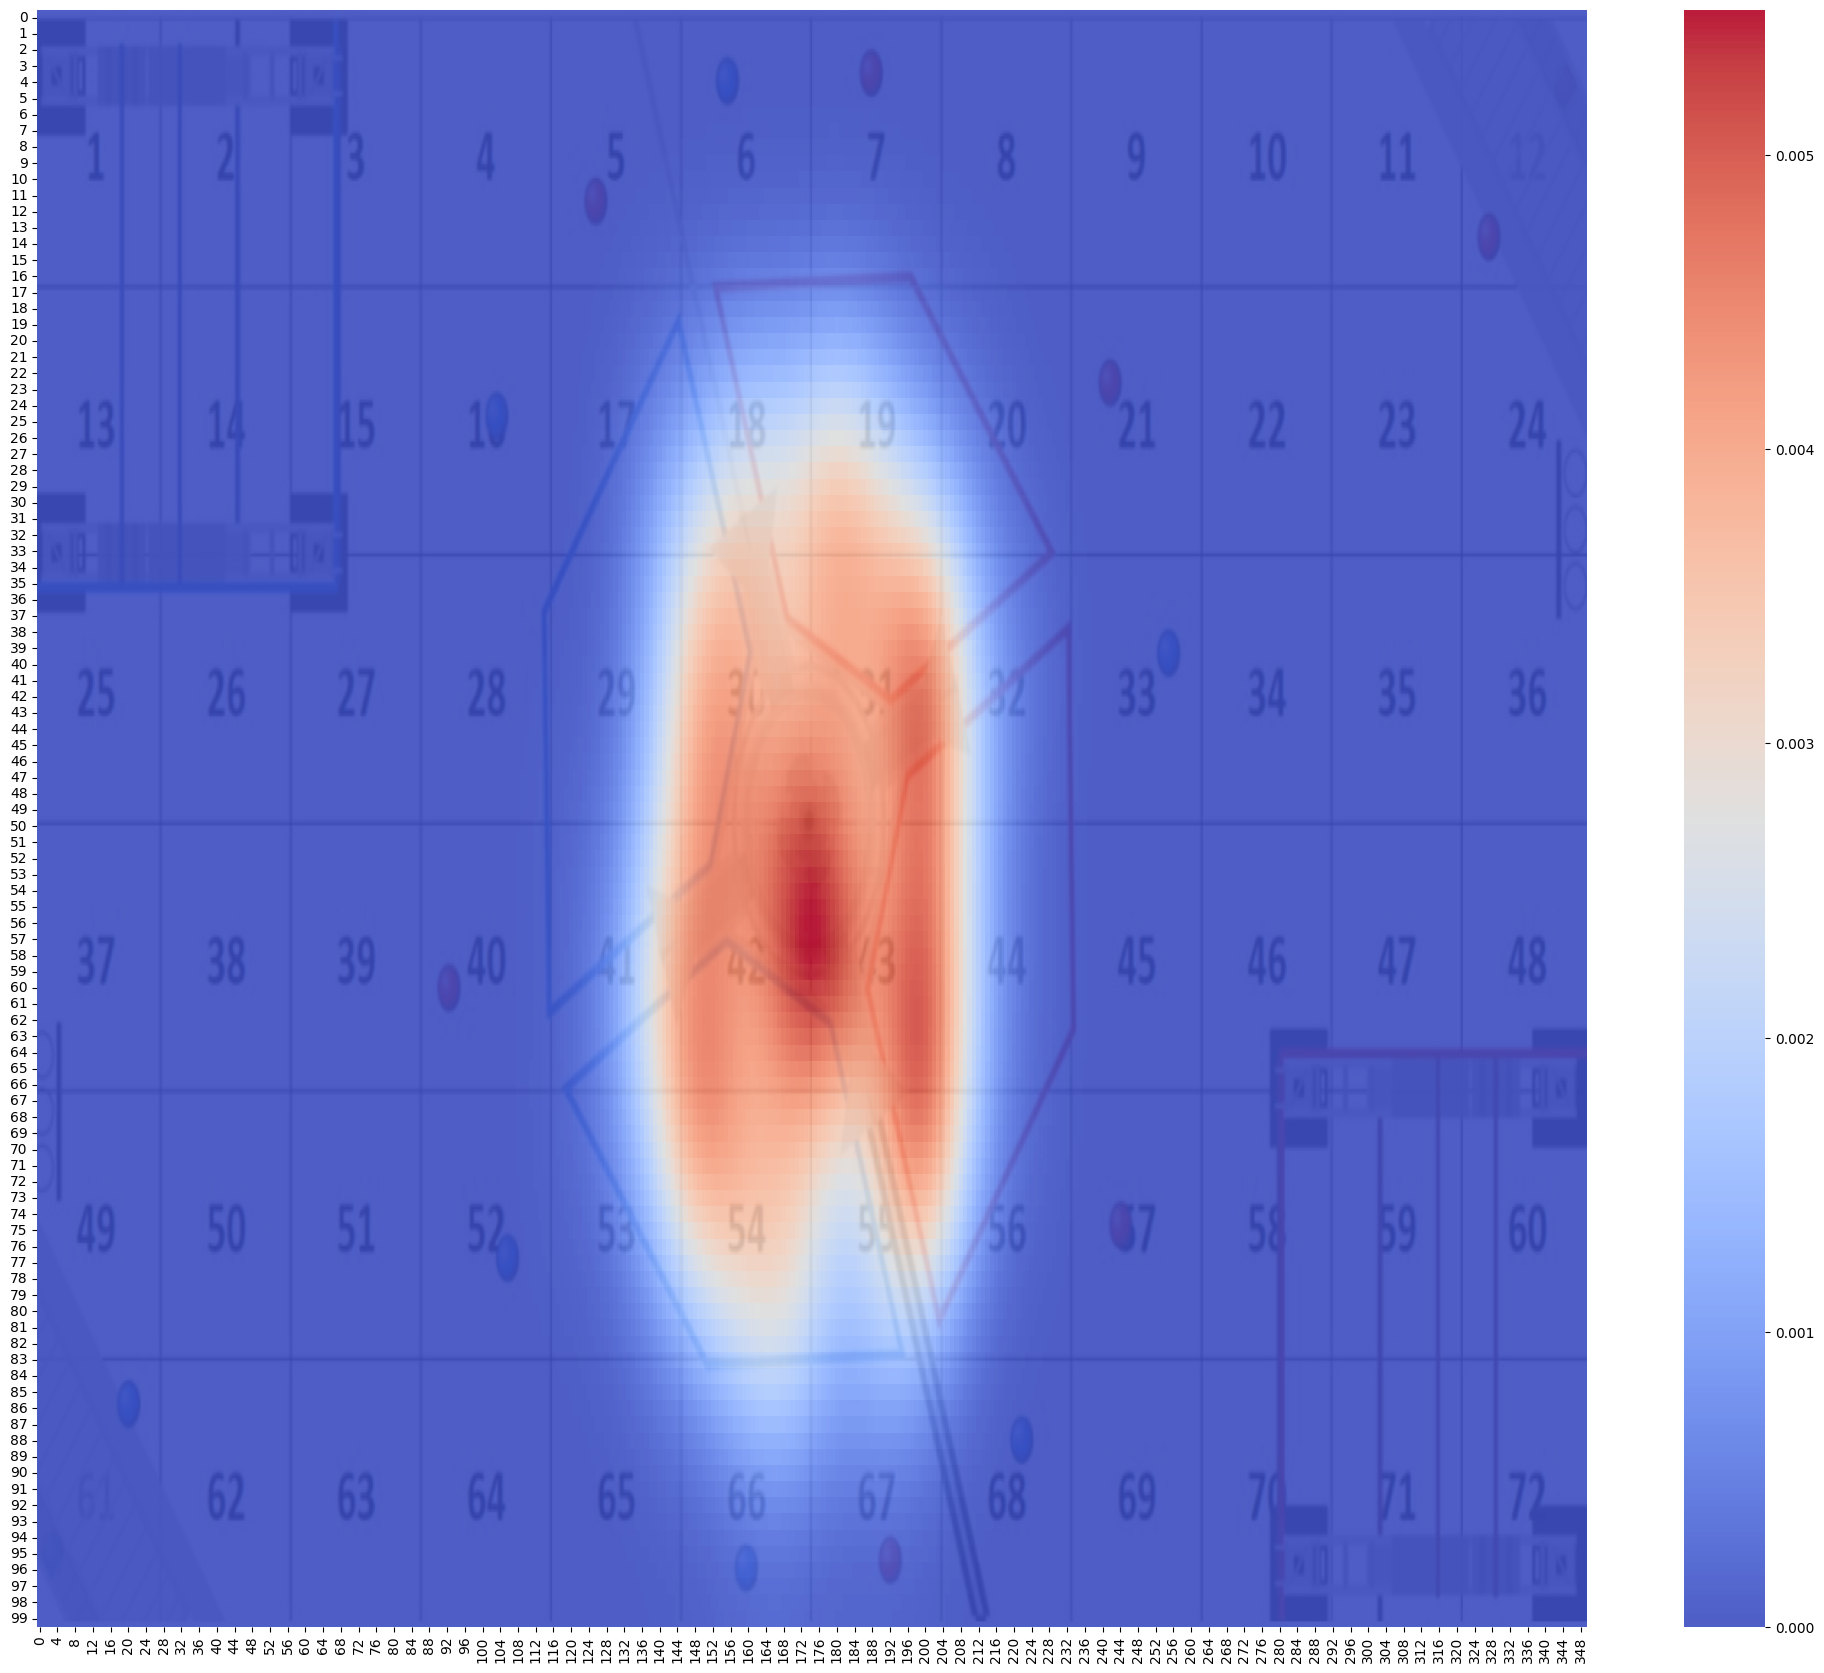

In [ ]:
AM_img = AM/np.max(AM); 

AM_img = gaussian_filter(AM_img, sigma=8);

I_scr = Image.open("Field.jpg")

fig, ax = plt.subplots(figsize=(25,21))

hmax = sns.heatmap(AM_img, ax=ax,
            cmap = matplotlib.cm.coolwarm,
            alpha = 0.9, 
            annot = False,
            zorder = 2
            )

hmax.imshow(I_scr, 
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap

print(hmax.get_xlim(), hmax.get_ylim())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8318c2b8-96d4-4254-8bf9-40651ea68923' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>